In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#plots.style.use('fivethirtyeight')
import networkx as nx
import pandas as pd
from itertools import combinations
import math
import random
! pip install python-louvain
import community 
from networkx.algorithms.community import k_clique_communities

You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
#G = nx.DiGraph()
data = pd.read_csv("City_Trees.csv",usecols=["SPECIES","Latitude","Longitude"])
data.dropna(inplace = True)
trees = data["SPECIES"].str.split(" ", n =1, expand = True)
data["genus"] = trees[0]
data["species"] = trees[1]
#data['ID'] = range(len(data))
data.drop(columns = ["SPECIES"], inplace= True)
data = data[data.genus != 'Planting']
data = data[data.species != 'Site']
data = data[data.species != ' species']

data = data.reset_index()
#data = data.transpose()
n_attr = len(data.index.values)
attr = data.index.values
data.drop(columns = ["index"], inplace= True)
data['id'] = np.arange(len(data))
data.head()

#small, poorly sampled group to run code on
data200 = data.iloc[:200]
data200.to_csv('data200.csv')
data.head()

,Latitude,Longitude,genus,species,id
0,37.884954,-122.278251,Prunus,cerasifera,0
1,37.884965,-122.278166,Liquidambar,styraciflua,1
2,37.884816,-122.277695,Prunus,cerasifera,2
3,37.884632,-122.277194,Aesculus,californica,3
4,37.884794,-122.275969,Platanus,hybrida,4


In [4]:
#take smaller area of data

lat_lon_bounds = {}

lat_lon_bounds['BL'] = (37.88005, -122.26978)
lat_lon_bounds['BR'] = (37.88134, -122.25939)
lat_lon_bounds['TL'] = (37.88547, -122.26999)
lat_lon_bounds['TR'] = (37.88672, -122.26042)



latitude = data['Latitude']
cleaned_lat = data[(latitude <= lat_lon_bounds['TR'][0]) & (latitude >= lat_lon_bounds["BL"][0])]

longitude = data['Longitude']

cleaned_data = cleaned_lat[(longitude <= lat_lon_bounds["BR"][1]) & (longitude >= lat_lon_bounds["TL"][1])]
cleaned_data = cleaned_data.reset_index()
cleaned_data.drop(columns = ["index"], inplace= True)
cleaned_data['id'] = np.arange(len(cleaned_data))

cleaned_data

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Latitude,Longitude,genus,species,id
0,37.881406,-122.269948,Ginkgo,biloba,0
1,37.881301,-122.269876,Ginkgo,biloba,1
2,37.881092,-122.269708,Ginkgo,biloba,2
3,37.881012,-122.269623,Ginkgo,biloba,3
4,37.880920,-122.269599,Ginkgo,biloba,4
5,37.880842,-122.269560,Ginkgo,biloba,5
6,37.880736,-122.269543,Ginkgo,biloba,6
7,37.880418,-122.269462,Ginkgo,biloba,7
8,37.880268,-122.269547,Acer,palmatum,8
9,37.880245,-122.269751,Acer,palmatum,9


In [5]:
def haversine(coord1, coord2):
    R = 6372800  # Earth radius in meters
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))

def calc_dist(node_tuple):
    first_node = node_tuple[0]
    second_node = node_tuple[1]
    return haversine(cleaned_data.iloc[first_node][0:2], cleaned_data.iloc[second_node][0:2])

def calc_weight(node_tuple):
    #returns firstly, the weight, secondly, the calculated distance, 
    #and lastly, 2 if different genus+species, 1 if different species but same genus
    outer_ring_threshhold = 400
    inner_ring_threshhold = 100
    
    dist = calc_dist(node_tuple)
    first_node = node_tuple[0]
    second_node = node_tuple[1]
    genus1 = cleaned_data.iloc[first_node][2]
    species1 = cleaned_data.iloc[first_node][3]
    genus2 = cleaned_data.iloc[second_node][2]
    species2 = cleaned_data.iloc[second_node][3]
    
    if dist < inner_ring_threshhold: 
        if genus1 != genus2:
            return 4, dist, 2
        elif species1 != species2:
            return 3, dist, 1
        else: 
            return 0, 0, 0
    elif dist < outer_ring_threshhold: 
        if genus1 != genus2:
            return 2, dist, 2
        elif species1 != species2:
            return 1, dist, 1
        else: 
            return 0, 0, 0 
    else: 
        return 0, 0, 0

In [6]:
links = []

for comb_of_2_plant_ids in combinations(cleaned_data['id'], 2):
    weight, dist, dif_genus_species = calc_weight(comb_of_2_plant_ids)
    if weight != 0:
        links.append([comb_of_2_plant_ids[0], comb_of_2_plant_ids[1], weight, dist, dif_genus_species])
        
links = np.array(links)

print(links)
print(len(links))

[[  0.           8.           2.         131.33686741   2.        ]
 [  0.           9.           2.         130.28801862   2.        ]
 [  0.          10.           2.         145.7299498    2.        ]
 ...
 [838.         841.           4.          47.36687077   2.        ]
 [839.         841.           4.          48.71928612   2.        ]
 [840.         841.           4.          59.27323968   2.        ]]
147443


In [7]:
edges = pd.DataFrame({"first_node": links[:,0], 
                      "second_node": links[:,1], 
                      "weight": links[:,2],
                      "dist": links[:,3],
                      "dif_genus_species": links[:,4]})
edges.to_csv('final_edges.csv')
print(edges.shape)
edges.head()

(147443, 5)


,first_node,second_node,weight,dist,dif_genus_species
0,0.0,8.0,2.0,131.336867,2.0
1,0.0,9.0,2.0,130.288019,2.0
2,0.0,10.0,2.0,145.729950,2.0
3,0.0,11.0,2.0,157.002311,2.0
4,0.0,12.0,4.0,65.482824,2.0


In [8]:
G = nx.Graph()

In [9]:
for index, row in edges.iterrows():
    G.add_edge(row['first_node'], row['second_node'], weight=row['weight'])

In [10]:
filtered_data = cleaned_data[cleaned_data['id'].isin(list(G.nodes()))]

In [11]:
filtered_data

,Latitude,Longitude,genus,species,id
0,37.881406,-122.269948,Ginkgo,biloba,0
1,37.881301,-122.269876,Ginkgo,biloba,1
2,37.881092,-122.269708,Ginkgo,biloba,2
3,37.881012,-122.269623,Ginkgo,biloba,3
4,37.880920,-122.269599,Ginkgo,biloba,4
5,37.880842,-122.269560,Ginkgo,biloba,5
6,37.880736,-122.269543,Ginkgo,biloba,6
7,37.880418,-122.269462,Ginkgo,biloba,7
8,37.880268,-122.269547,Acer,palmatum,8
9,37.880245,-122.269751,Acer,palmatum,9


In [12]:
deg_list = []
for node in sorted(list(G.nodes())):
    #print ("Degree of ", node, " are : ", G.degree(node))
    deg_list.append(G.degree(node))


In [13]:
filtered_data['degree'] = deg_list

In [14]:
total_degree_by_genus = filtered_data.groupby('genus')['degree'].sum().sort_values(ascending=False)

In [15]:
avg_degree_by_genus = filtered_data.groupby('genus')['degree'].mean().sort_values(ascending=False)

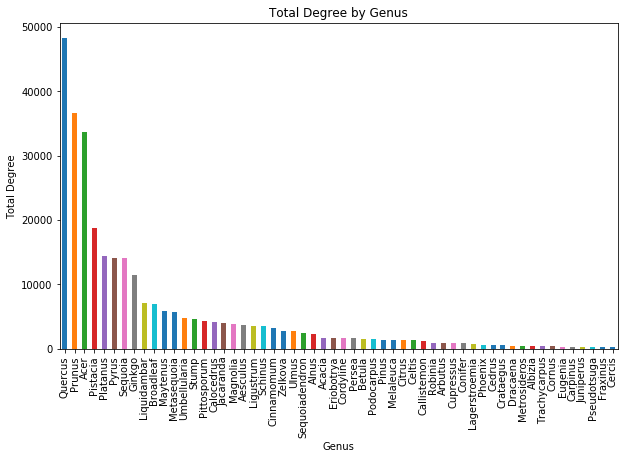

In [16]:
plt.figure(figsize=(10, 6))
total_degree_by_genus.plot(kind='bar')
plt.title("Total Degree by Genus")
plt.ylabel("Total Degree")
plt.xlabel("Genus")
plt.show()

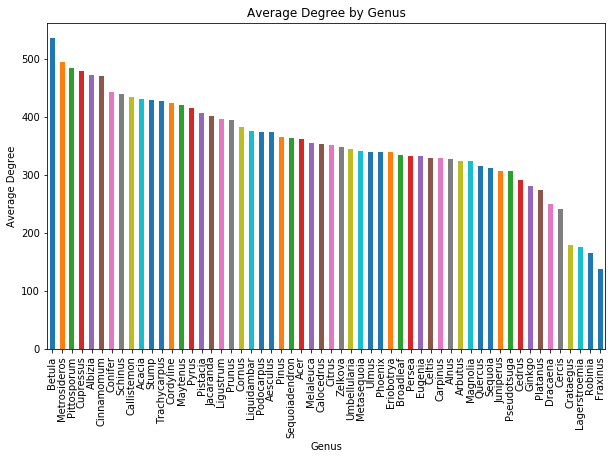

In [17]:
plt.figure(figsize=(10, 6))
avg_degree_by_genus.plot(kind='bar')
plt.title("Average Degree by Genus")
plt.ylabel("Average Degree")
plt.xlabel("Genus")
plt.show()

In [18]:
filtered_data

,Latitude,Longitude,genus,species,id,degree
0,37.881406,-122.269948,Ginkgo,biloba,0,236
1,37.881301,-122.269876,Ginkgo,biloba,1,221
2,37.881092,-122.269708,Ginkgo,biloba,2,193
3,37.881012,-122.269623,Ginkgo,biloba,3,189
4,37.880920,-122.269599,Ginkgo,biloba,4,180
5,37.880842,-122.269560,Ginkgo,biloba,5,169
6,37.880736,-122.269543,Ginkgo,biloba,6,158
7,37.880418,-122.269462,Ginkgo,biloba,7,128
8,37.880268,-122.269547,Acer,palmatum,8,127
9,37.880245,-122.269751,Acer,palmatum,9,125


In [19]:
lat_lon_dict = {}
for index, row in filtered_data.iterrows():
    node=row[4]
    lat=row[0]
    lon=row[1]
    lat_lon_dict[node] = (lon,lat)

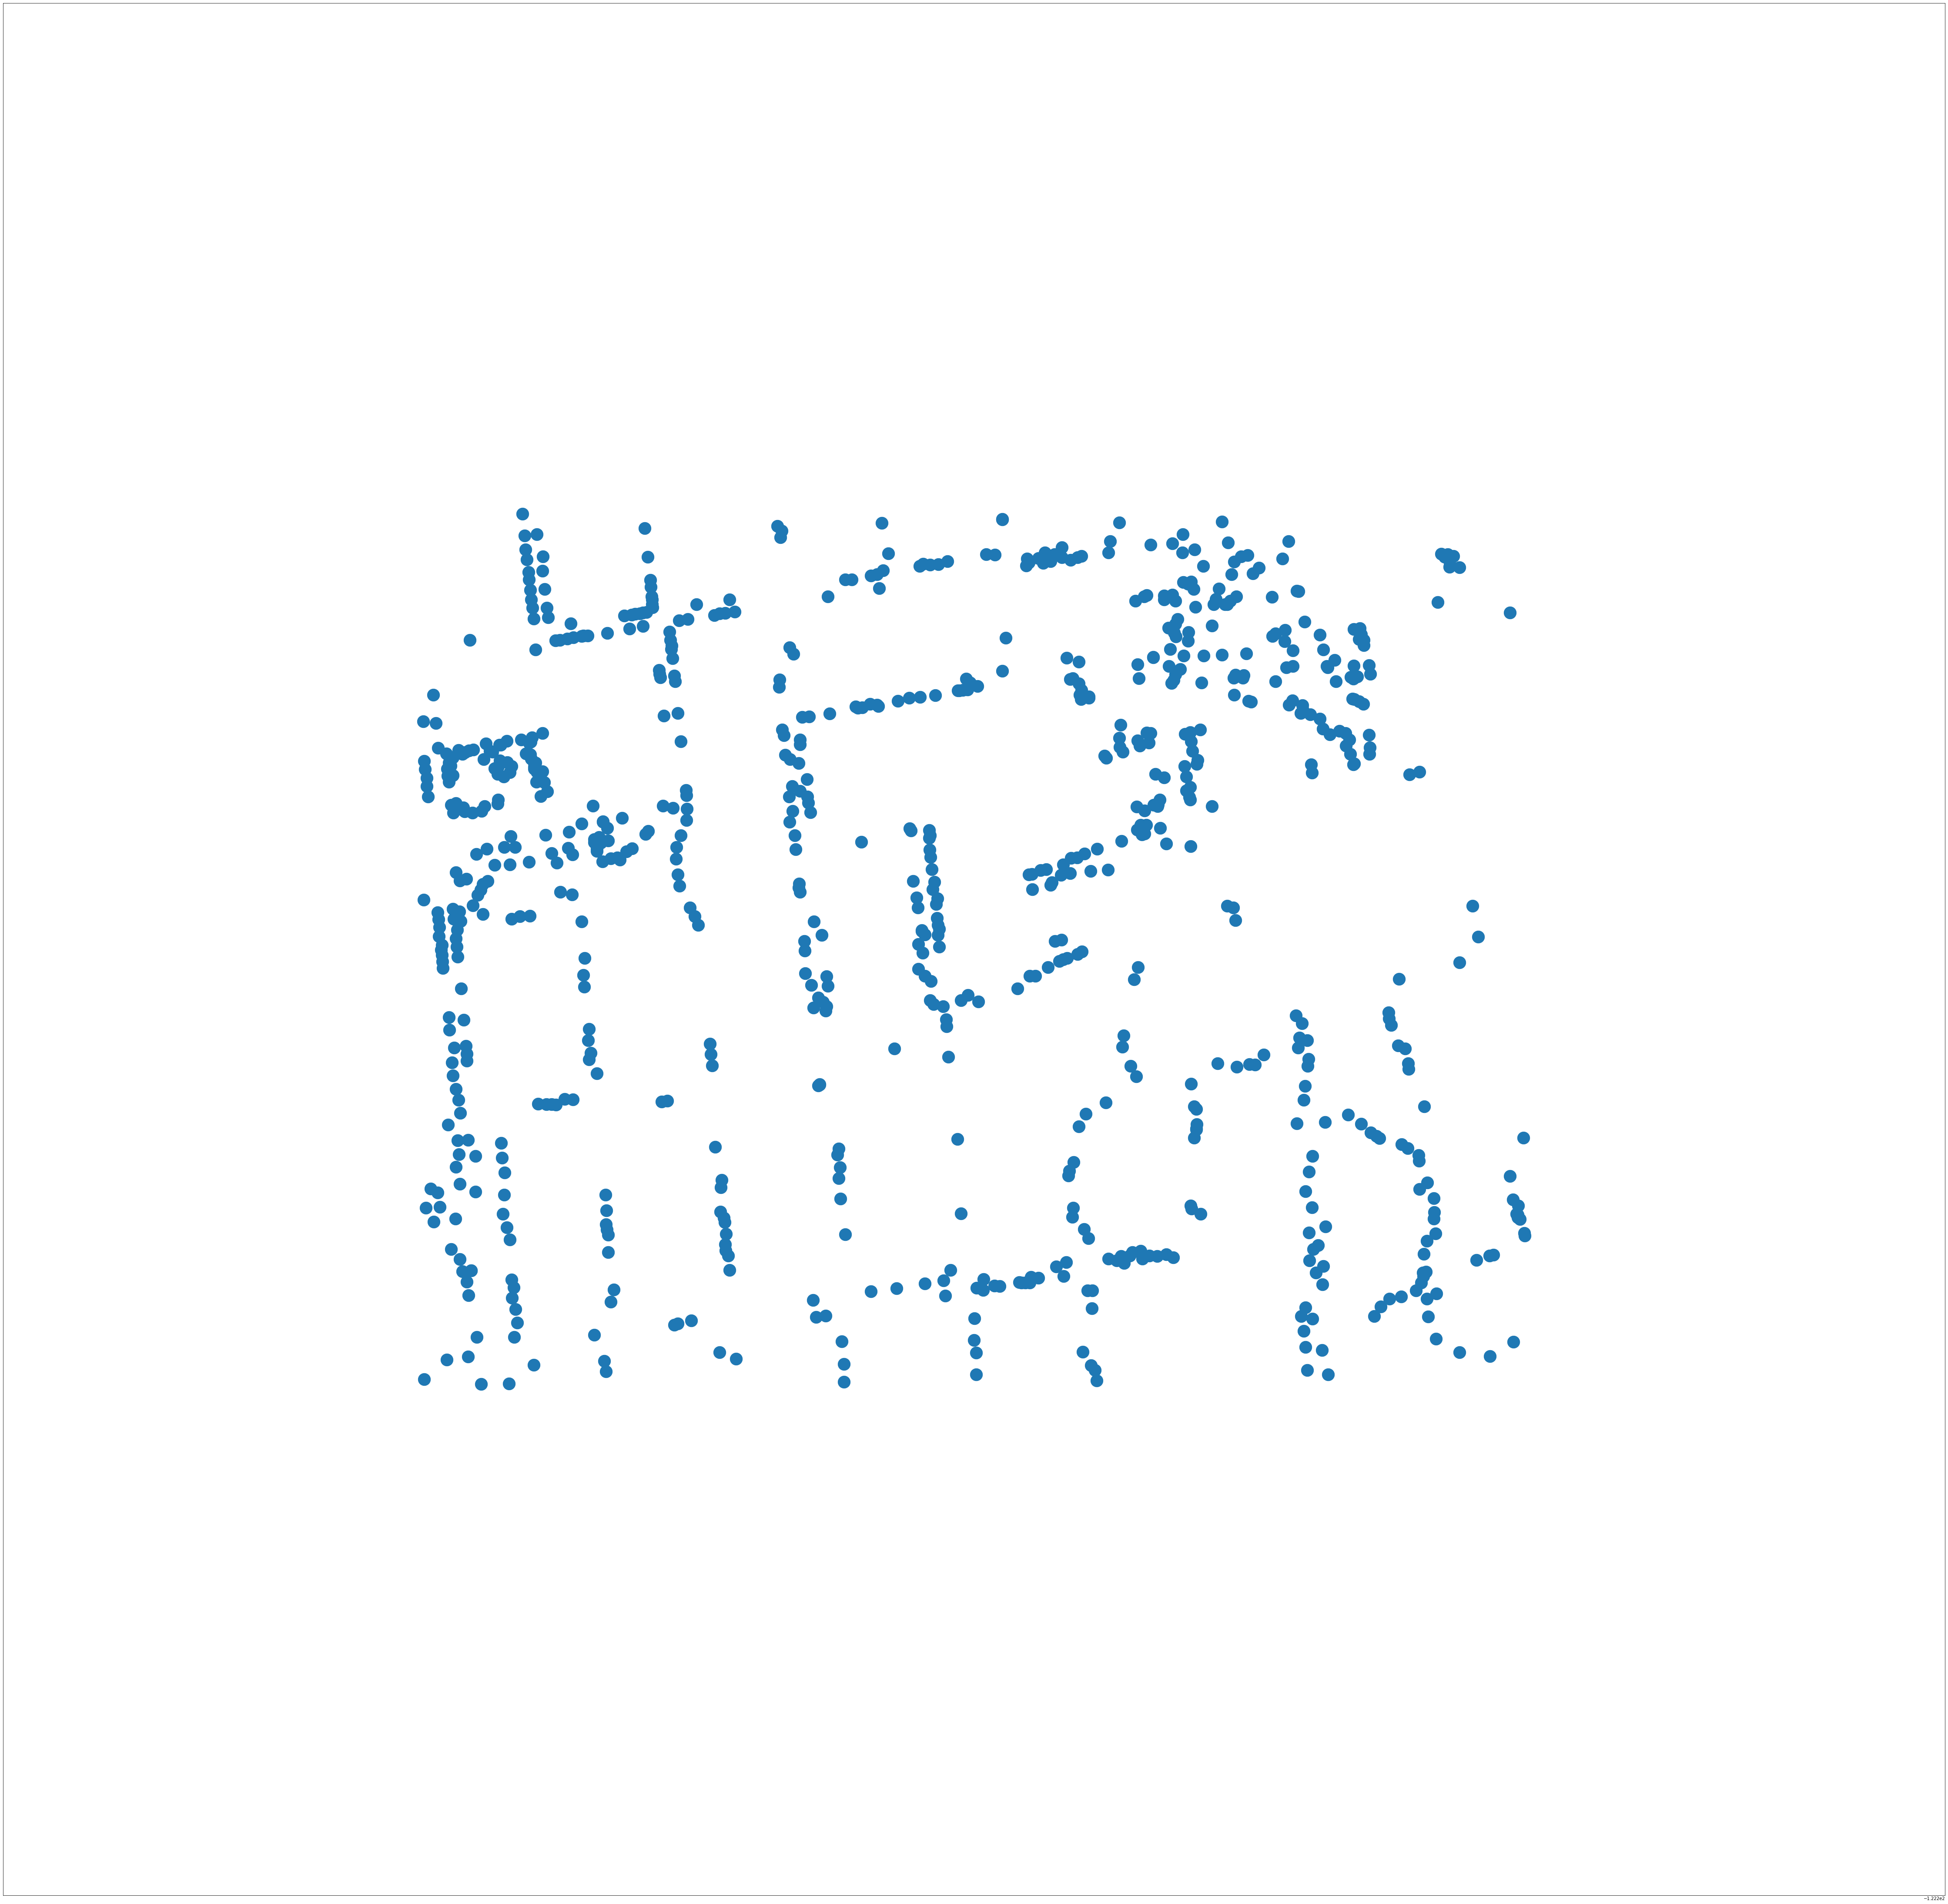

In [20]:
plt.figure(figsize=(80,80))
nx.draw_networkx_nodes(G,lat_lon_dict, node_size=800)          
plt.show()

In [21]:
close_centrality = list(nx.closeness_centrality(G).values())

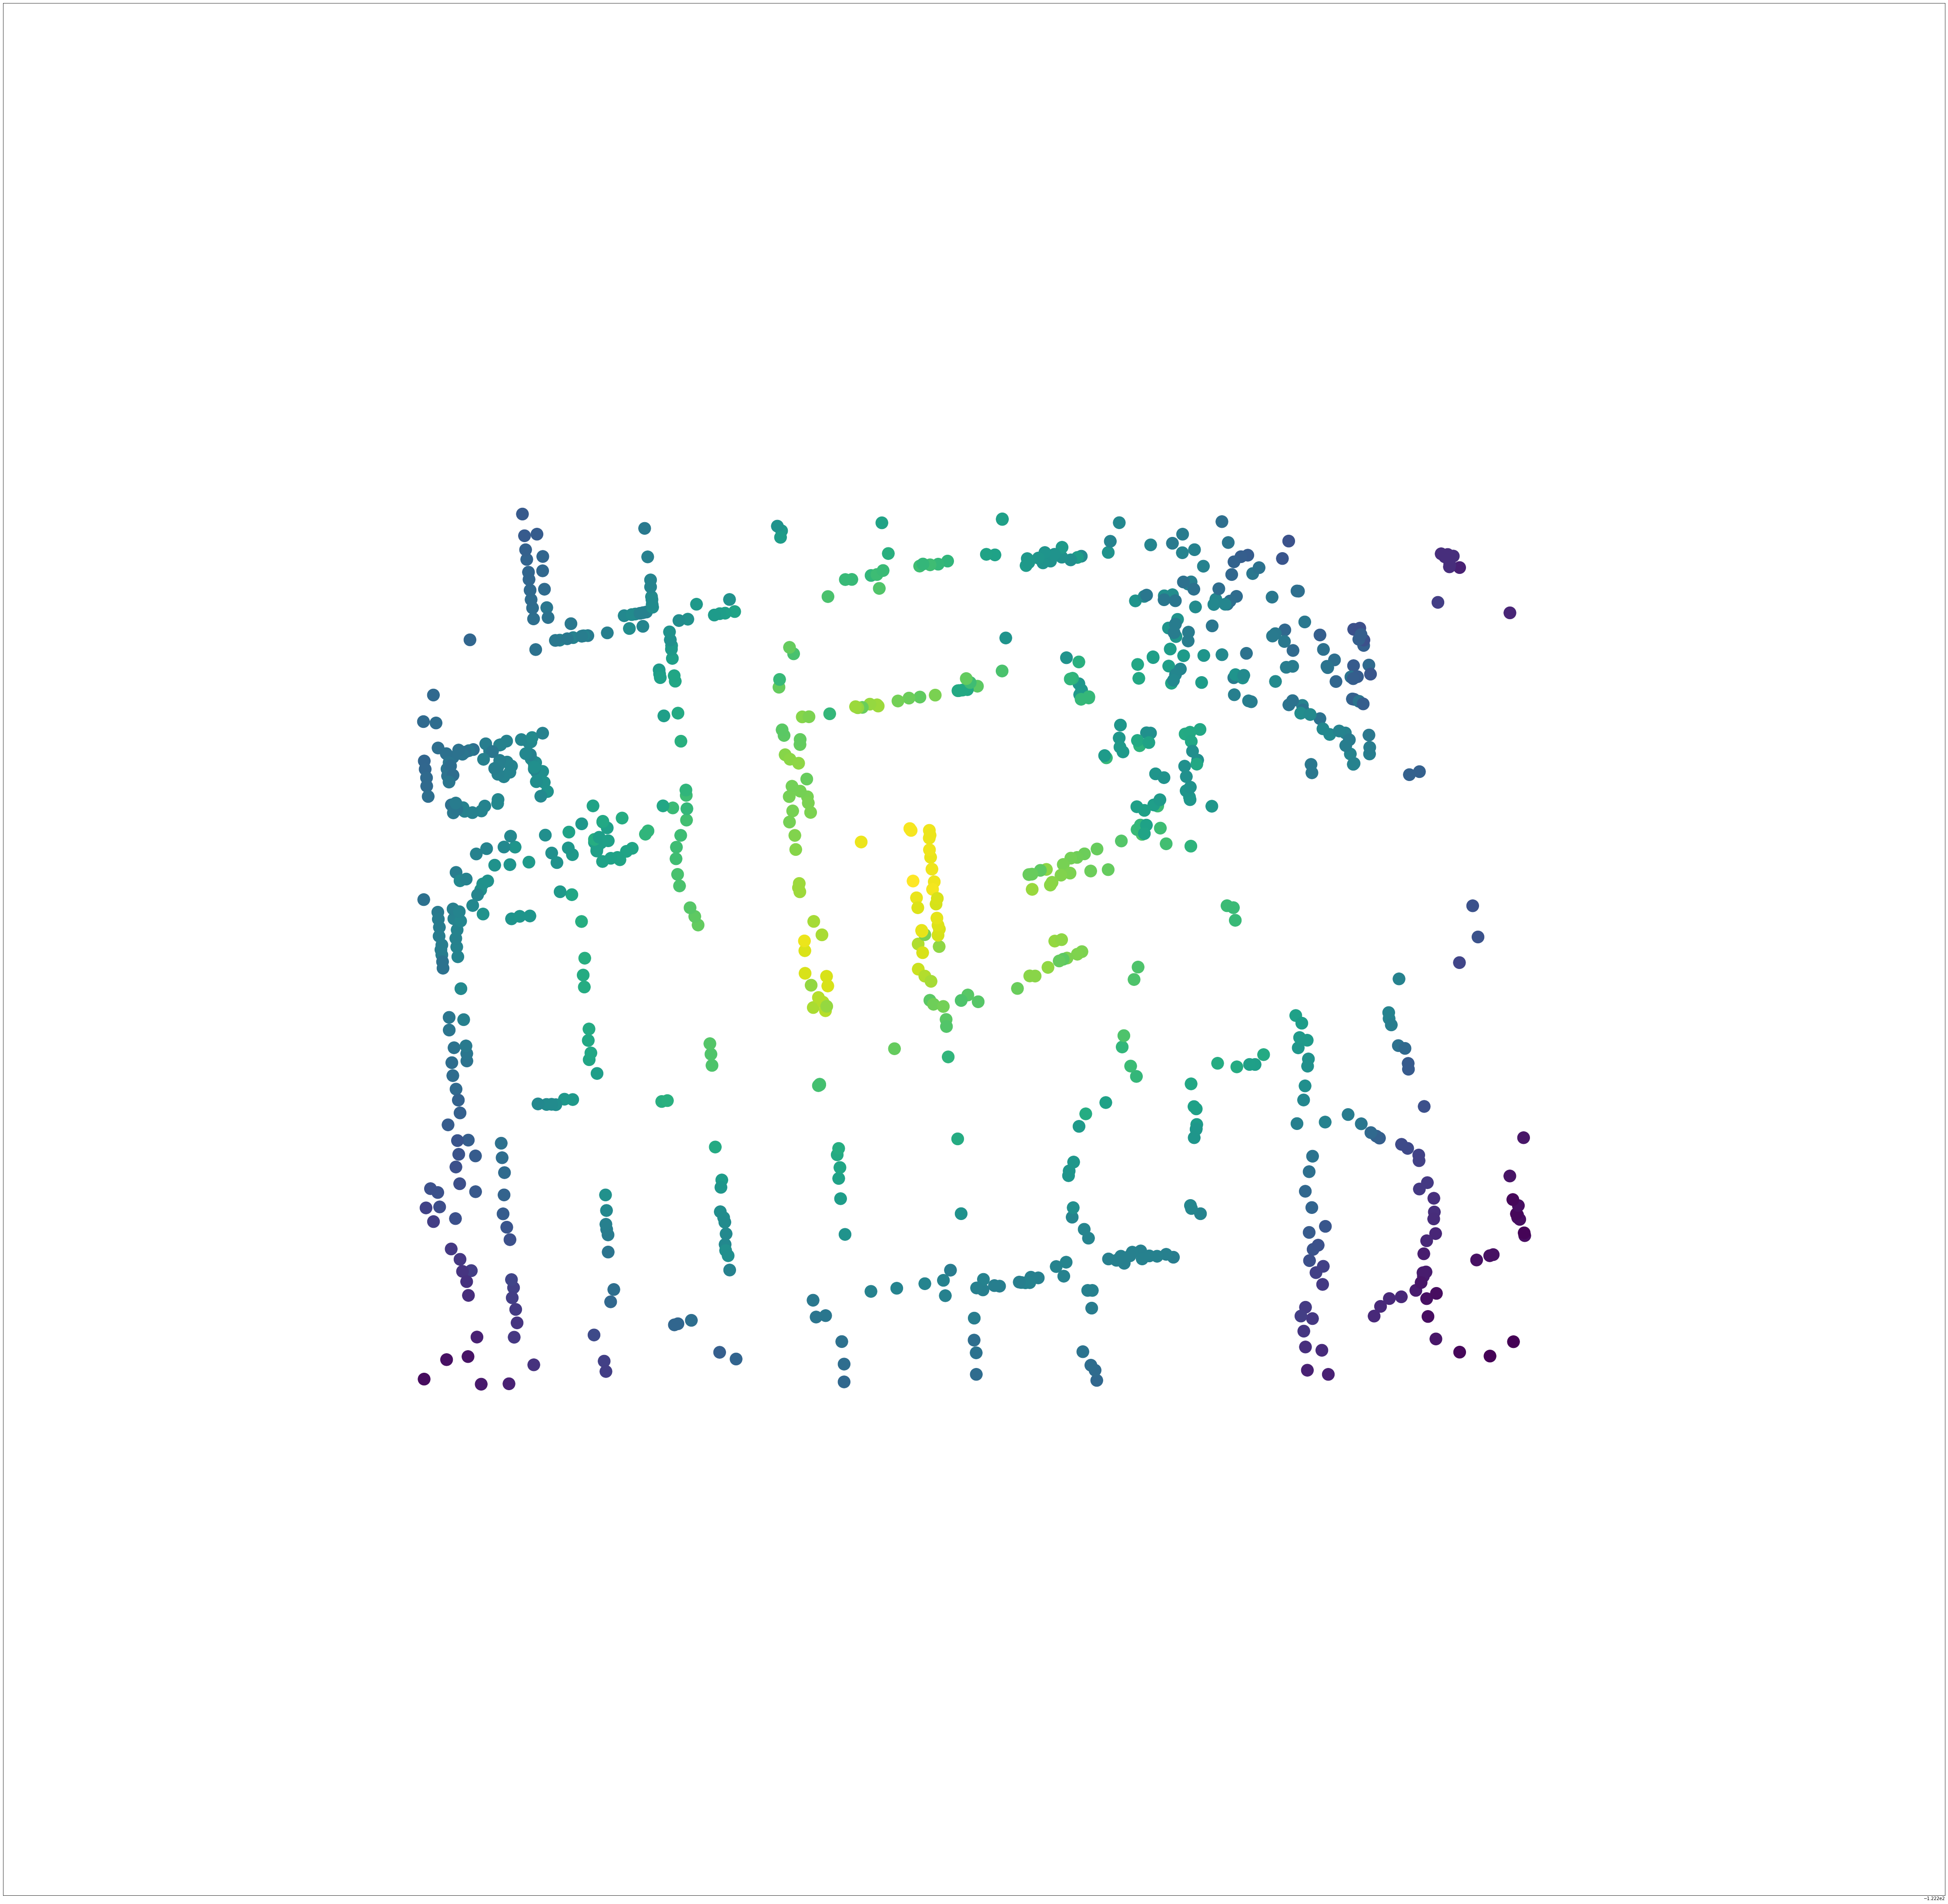

In [22]:
plt.figure(figsize=(80,80))
nx.draw_networkx_nodes(G,lat_lon_dict, node_size=800,node_color=close_centrality)          
plt.show()

In [36]:
nodes = pd.read_csv("cleaned_data.csv")
links = pd.read_csv("edges-1.csv")

# build commuter flow network
g = nx.Graph()
for index, row in links.iterrows():
 
    g.add_edge(row[0],row[1],weight=row[2])
    
# a) How many nodes and links are there?
print(nx.number_of_nodes(g))
print(nx.number_of_edges(g))

16063
16063


In [37]:
poss = {}

rows = []
for index, row in nodes.iterrows():
    node=row[0]
    lat=row[2]
    lon=row[3]
    poss[node] = (lon,lat)
    

In [38]:
#only connected nodes
comps = sorted(nx.connected_components(g),key = len, reverse=True)
nodes_gc=comps[0]
G = nx.subgraph(g, nodes_gc)


In [39]:
#SHORTEST PATH LENGTHS

In [ ]:
lengths = nx.shortest_path_length(g)
st_length = {}  #this will saves the maximun path per station
ml=0
for key in lengths:   #iterates in all the lengths per station 
   ll = key     #only gives an intuitive name
   i = max(ll[1].values())  #finds the maximun value of length    
   st_length[ll[0]] = i  #ll[0] has the name of the station and and i the value 
   if i > ml:
      ml = i  #this will save the overall maximun
   print("For tree with id", ll[0]," max length is ",i) 

For tree with id 0.0  max length is  4
For tree with id 1.0  max length is  5
For tree with id 2.0  max length is  5
For tree with id 3.0  max length is  5
For tree with id 4.0  max length is  5
For tree with id 5.0  max length is  5
For tree with id 6.0  max length is  5
For tree with id 7.0  max length is  5
For tree with id 8.0  max length is  5
For tree with id 9.0  max length is  5
For tree with id 10.0  max length is  5
For tree with id 11.0  max length is  5
For tree with id 12.0  max length is  5
For tree with id 13.0  max length is  6
For tree with id 14.0  max length is  6
For tree with id 15.0  max length is  6
For tree with id 16.0  max length is  6
For tree with id 17.0  max length is  6
For tree with id 18.0  max length is  6
For tree with id 19.0  max length is  6
For tree with id 20.0  max length is  6
For tree with id 21.0  max length is  6
For tree with id 22.0  max length is  6
For tree with id 23.0  max length is  6
For tree with id 24.0  max length is  6
For tree w

In [ ]:
lengths = nx.shortest_path_length(g)

In [ ]:
lengths = nx.shortest_path_length(g, weight ="weight")
plengths=[]
for key in lengths:   #iterates all the kengths
   ll = key
   for i in list(ll[1].values()):    #saves a list with the lengths greater than zero
      if i > 0:plengths.append(i)

In [ ]:
len(plengths)

In [ ]:
plt.hist(plengths, density=True)  # `density=False` would make counts
plt.title("shortest path lengths")
plt.ylabel('density')
plt.xlabel('shortest path length')